In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot



# Read CSV
dataset = pd.read_csv('CE802_P3_Data.csv')
print(dataset.shape)

(1500, 37)


In [30]:
print(dataset.columns)

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21',
       'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31',
       'F32', 'F33', 'F34', 'F35', 'F36', 'Target'],
      dtype='object')


In [31]:
dataset.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,-69.21,16536.84,6,Europe,-16720.42,735.74,22.14,15.48,Medium,124.05,...,-506.31,-3077.82,15.35,-53.04,-112.43,-2537.30,4.06,40.32,3.18,2697.84
1,-168.67,28434.21,12,UK,-8070.93,91.35,-1.86,18.60,Very high,57.78,...,-731.28,-4559.70,20.74,-36.44,-44.06,-2384.48,33.52,176.98,5.81,3632.57
2,-76.19,22895.97,18,Europe,-12126.02,145.64,-68.28,14.22,High,-65.88,...,-355.08,-3965.13,16.65,-76.06,-81.66,-2225.42,28.90,165.00,2.85,2257.40
3,-103.19,22926.51,12,Europe,-10050.95,218.39,-40.58,14.99,Very high,132.12,...,-518.52,-1509.87,21.99,-128.34,-142.53,-1320.10,1.12,211.88,2.96,1785.03
4,-49.84,-4224.12,6,Rest,-10197.84,-346.17,-47.04,8.92,High,113.31,...,-576.60,-1907.67,14.10,72.98,-75.83,-2019.04,8.16,154.32,2.92,1063.23


In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   int64  
 3   F4      1500 non-null   object 
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   object 
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  F17     1500 non-null   float64
 17  F18     1500 non-null   float64
 18  F19     1500 non-null   float64
 19  F20     1500 non-null   float64
 20  F21     1500 non-null   float64
 21  F22     1500 non-null   float64
 22  

In [33]:
dataset['F5'].value_counts()

-10029.96    2
-12330.82    2
-16720.42    1
-3961.95     1
-5208.20     1
            ..
-9729.63     1
-11035.02    1
-9282.10     1
-9798.30     1
-7895.09     1
Name: F5, Length: 1498, dtype: int64

In [34]:
dataset['F21'].value_counts()

362.88    3
395.64    3
319.02    3
391.74    3
419.49    3
         ..
391.38    1
391.20    1
369.36    1
359.31    1
392.28    1
Name: F21, Length: 1409, dtype: int64

In [35]:
def minMax(x):
    return pd.Series(index=['min','max','mean','median'],data=[x.min(),x.max(),x.mean(),x.median()])

ds = dataset.drop(['F4','F9'], axis=1)
ds.apply(minMax)

,F1,F2,F3,F5,F6,F7,F8,F10,F11,F12,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
min,-265.06000,-4224.1200,0.000,-21423.150000,-716.74000,-204.360000,-7.46000,-201.6900,-2756.04000,-36.250000,...,-1229.46000,-10591.68000,-8.30000,-477.520000,-187.980000,-4477.320,0.000000,-218.40000,0.50000,-2685.920000
max,100.09000,53118.0600,33.000,611.930000,1303.86000,208.160000,34.41000,419.9700,4519.86000,11.640000,...,-59.16000,2229.27000,34.31000,486.860000,20.620000,33.940,45417.440000,711.34000,17.77000,3836.440000
mean,-73.62494,21474.8248,11.932,-9995.737133,244.58424,12.709347,14.79056,84.2205,1523.14356,-10.138207,...,-604.63424,-3901.57396,16.28294,-24.106147,-83.031673,-2016.873,147.677373,193.13512,4.36902,856.493547
median,-73.88500,21579.5250,12.000,-10029.960000,238.91500,13.640000,14.79000,85.9350,1553.56500,-10.115000,...,-602.68500,-3928.74000,16.39000,-23.350000,-83.330000,-2018.190,2.170000,194.61000,3.71000,624.735000


In [36]:
dataset[dataset.columns[:]].corr()['Target'][:]

F1       -0.041725
F2       -0.001184
F3       -0.330411
F5       -0.004574
F6        0.078041
F7       -0.018111
F8       -0.050519
F10       0.010754
F11       0.022837
F12       0.015091
F13       0.048893
F14      -0.052481
F15       0.085837
F16      -0.001310
F17      -0.025662
F18      -0.015650
F19       0.006143
F20       0.007440
F21       0.033530
F22      -0.021697
F23      -0.211590
F24       0.017988
F25      -0.082510
F26      -0.135855
F27      -0.003702
F28      -0.056762
F29      -0.054768
F30       0.043625
F31       0.023321
F32       0.036877
F33      -0.293027
F34       0.106413
F35       0.019449
F36      -0.463560
Target    1.000000
Name: Target, dtype: float64

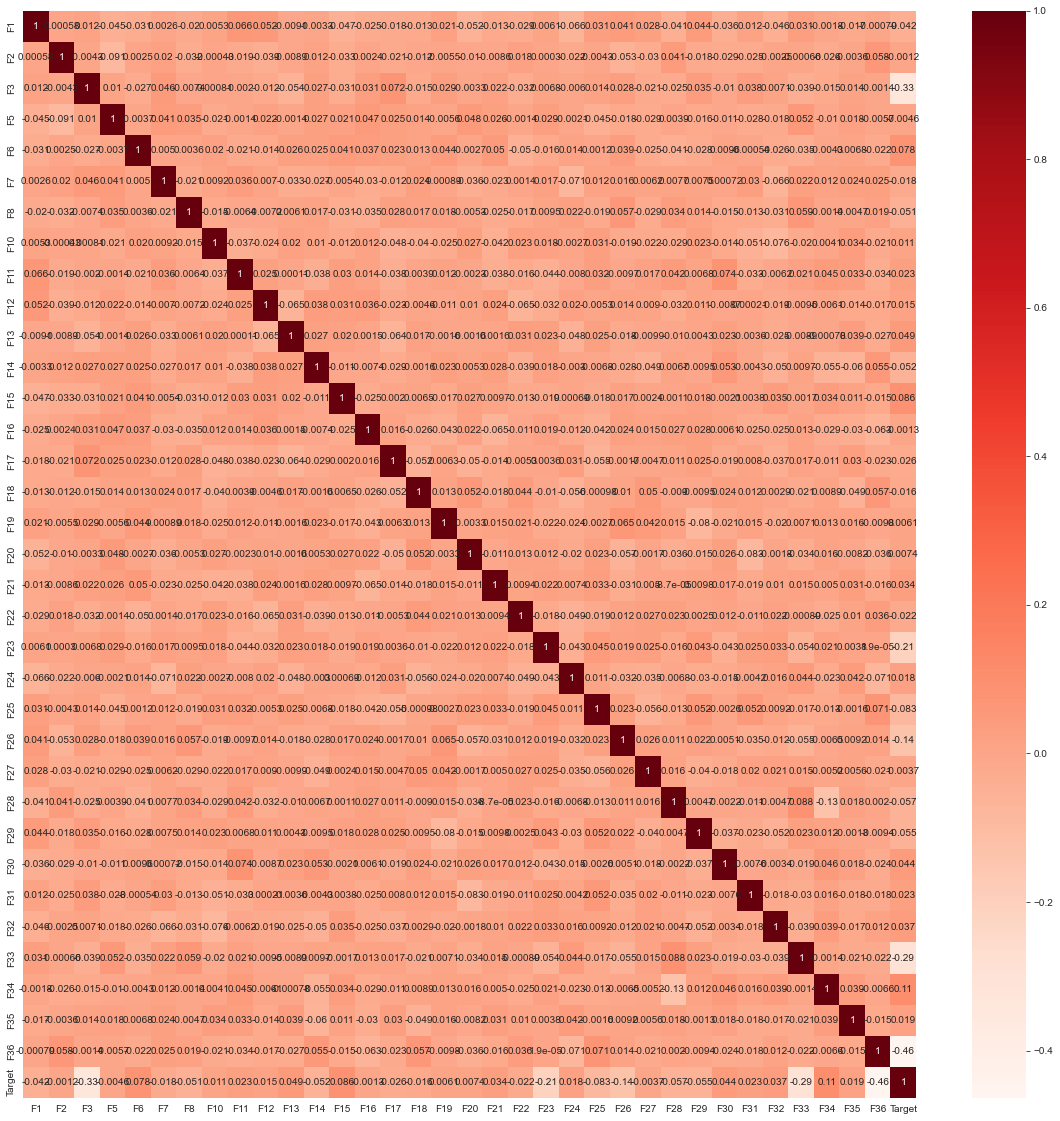

In [37]:
plot.figure(figsize=(20,20))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plot.cm.Reds)
plot.show()

In [38]:
#Correlation with output variable
cor_target = abs(cor["Target"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

F3        0.330411
F33       0.293027
F36       0.463560
Target    1.000000
Name: Target, dtype: float64

array([[<AxesSubplot:xlabel='F19', ylabel='F19'>,
        <AxesSubplot:xlabel='F28', ylabel='F19'>,
        <AxesSubplot:xlabel='F35', ylabel='F19'>],
       [<AxesSubplot:xlabel='F19', ylabel='F28'>,
        <AxesSubplot:xlabel='F28', ylabel='F28'>,
        <AxesSubplot:xlabel='F35', ylabel='F28'>],
       [<AxesSubplot:xlabel='F19', ylabel='F35'>,
        <AxesSubplot:xlabel='F28', ylabel='F35'>,
        <AxesSubplot:xlabel='F35', ylabel='F35'>]], dtype=object)

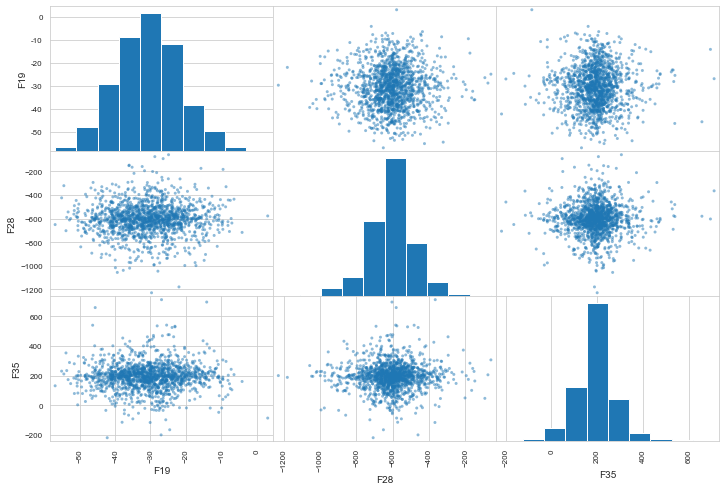

In [39]:
from pandas.plotting import scatter_matrix
attributes = ['F19','F28','F35']
scatter_matrix(dataset[attributes], figsize=(12, 8))

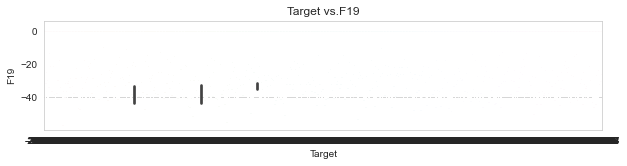

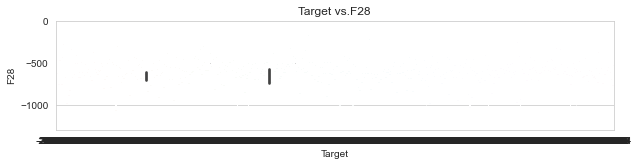

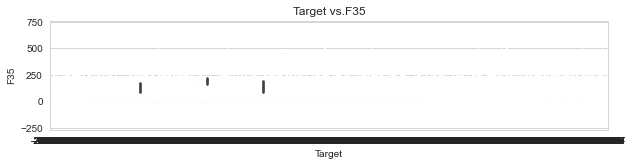

In [52]:
for eachCol in attributes:
  fig, (axis1) = plot.subplots(1,figsize=(10,2))
  axis1.title.set_text('Target vs.'+eachCol)
  sns.barplot(x='Target', y= eachCol, data=dataset, ax=axis1)

<AxesSubplot:ylabel='Frequency'>

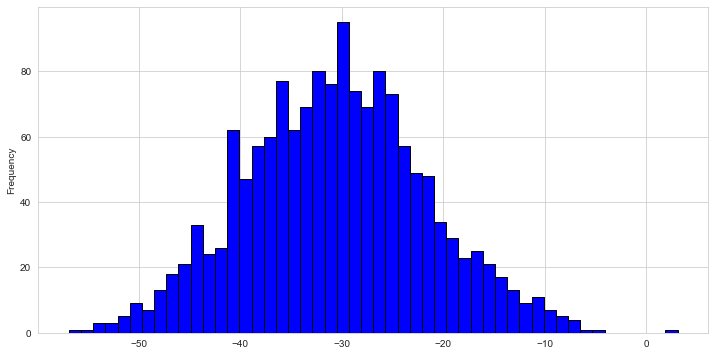

In [53]:
dataset['F19'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='blue',edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

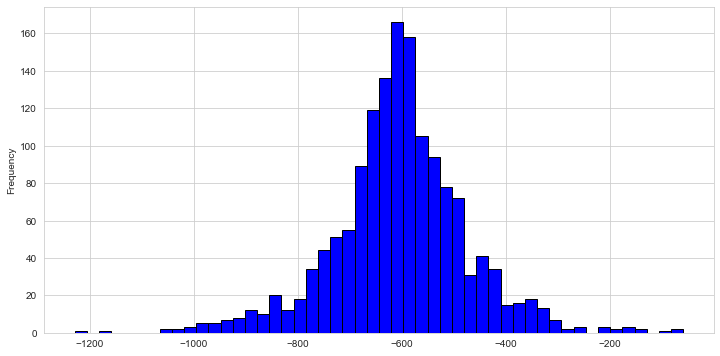

In [42]:
dataset['F28'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='blue',edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

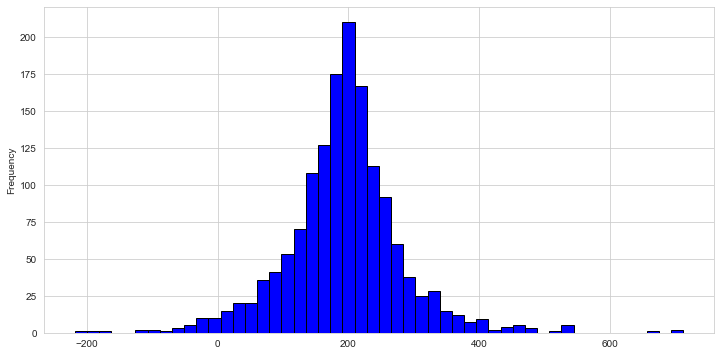

In [43]:
dataset['F35'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='blue',edgecolor='black')

In [44]:
filterDataset = dataset[['F18', 'F28','F35','Target']].copy()
filterDataset.head()

,F18,F28,F35,Target
0,-14982.14,-506.31,40.32,2697.84
1,-11318.10,-731.28,176.98,3632.57
2,-23039.76,-355.08,165.00,2257.40
3,-13324.14,-518.52,211.88,1785.03
4,-25230.76,-576.60,154.32,1063.23


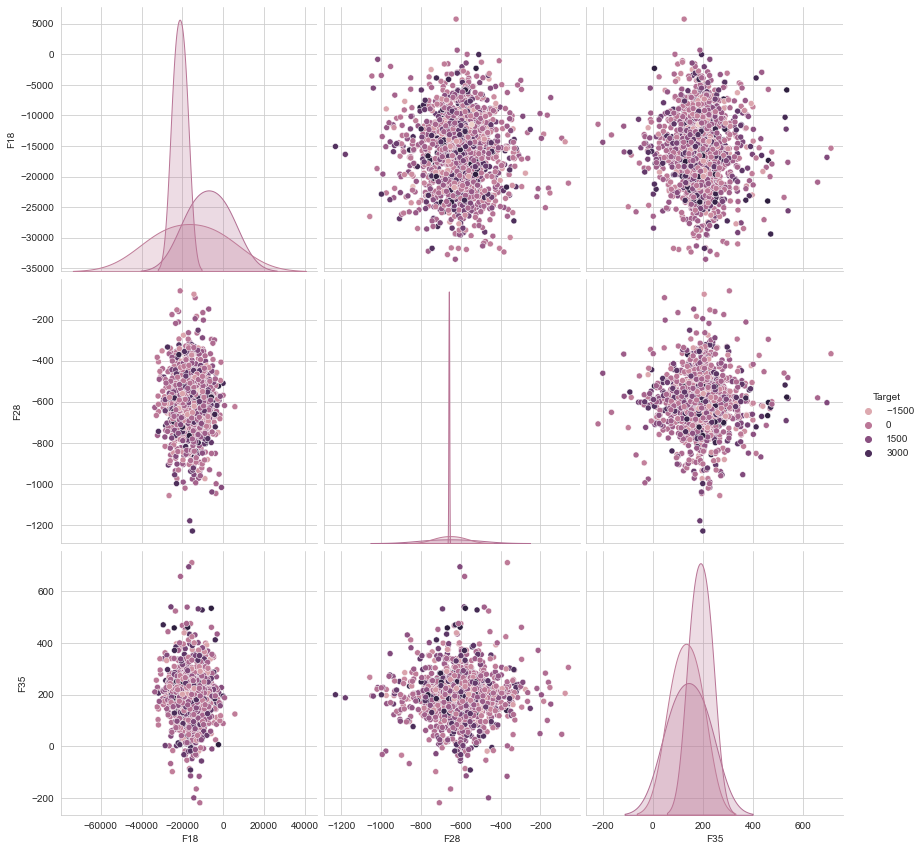

In [45]:
sns.set_style('whitegrid');
sns.pairplot(filterDataset, hue ='Target', height = 4)
plot.show()

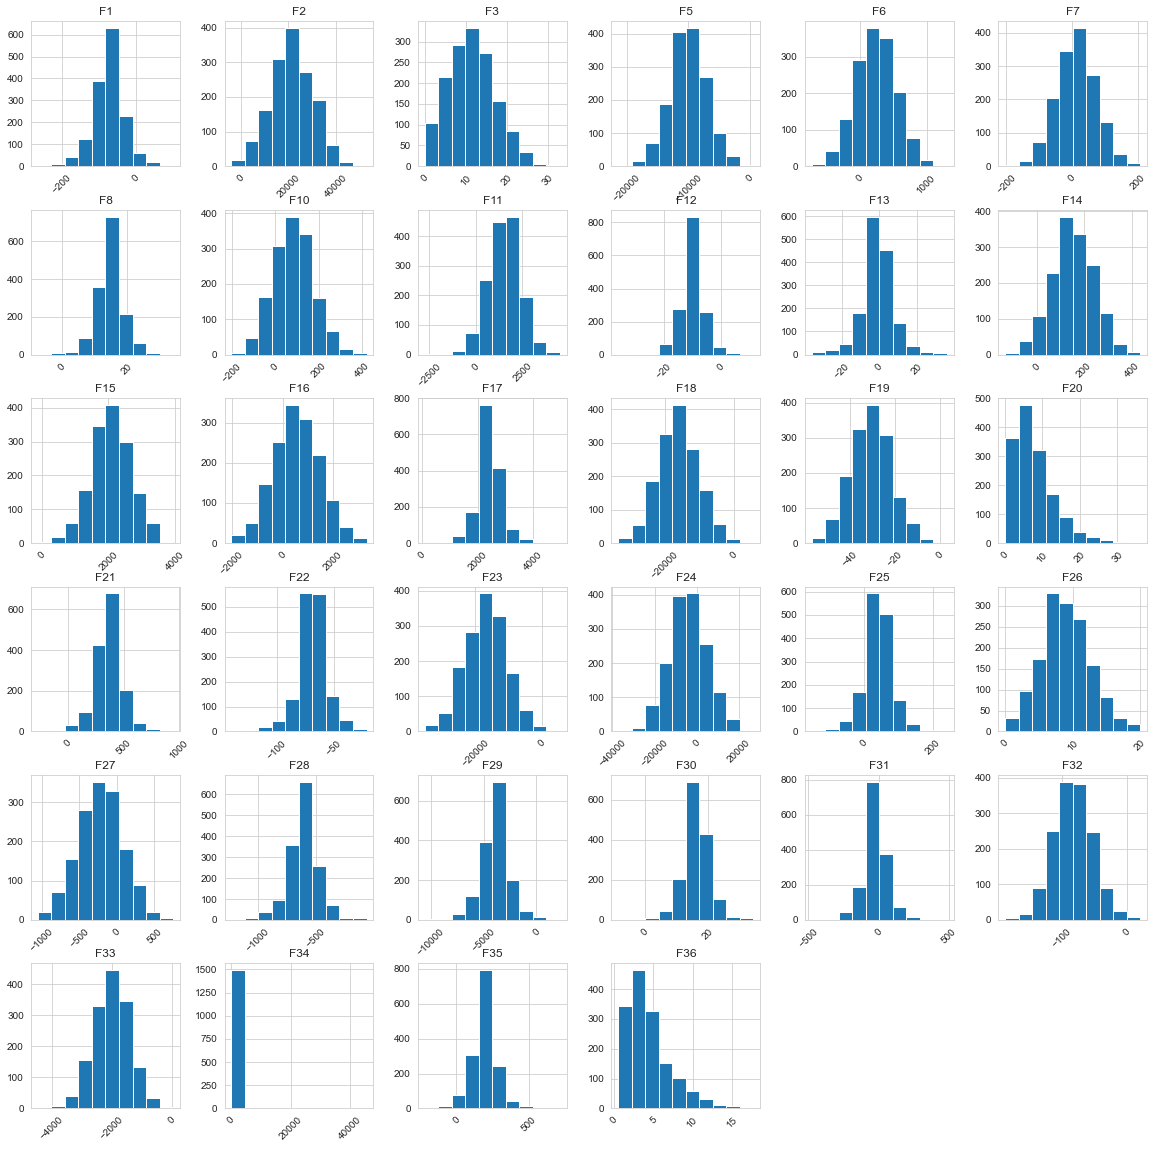

In [46]:
ds = dataset.drop(['F4','F9','Target'], axis=1)

ds.hist(figsize=(20,20), xrot=45)
plot.show()

In [78]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [55]:
dd = dataset.iloc[:,:-1].copy()
dd = pd.get_dummies(dd, columns= ['F4'])
dd.head()

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,...,F31,F32,F33,F34,F35,F36,F4_Europe,F4_Rest,F4_UK,F4_USA
0,-69.21,16536.84,6,-16720.42,735.74,22.14,15.48,Medium,124.05,1618.89,...,-53.04,-112.43,-2537.30,4.06,40.32,3.18,1,0,0,0
1,-168.67,28434.21,12,-8070.93,91.35,-1.86,18.60,Very high,57.78,1137.78,...,-36.44,-44.06,-2384.48,33.52,176.98,5.81,0,0,1,0
2,-76.19,22895.97,18,-12126.02,145.64,-68.28,14.22,High,-65.88,2065.89,...,-76.06,-81.66,-2225.42,28.90,165.00,2.85,1,0,0,0
3,-103.19,22926.51,12,-10050.95,218.39,-40.58,14.99,Very high,132.12,3228.42,...,-128.34,-142.53,-1320.10,1.12,211.88,2.96,1,0,0,0
4,-49.84,-4224.12,6,-10197.84,-346.17,-47.04,8.92,High,113.31,1678.11,...,72.98,-75.83,-2019.04,8.16,154.32,2.92,0,1,0,0


In [59]:
dd = pd.get_dummies(dd, columns= ['F9'])
dd.head()

,F1,F2,F3,F5,F6,F7,F8,F10,F11,F12,...,F36,F4_Europe,F4_Rest,F4_UK,F4_USA,F9_High,F9_Low,F9_Medium,F9_Very high,F9_Very low
0,-69.21,16536.84,6,-16720.42,735.74,22.14,15.48,124.05,1618.89,-1.19,...,3.18,1,0,0,0,0,0,1,0,0
1,-168.67,28434.21,12,-8070.93,91.35,-1.86,18.60,57.78,1137.78,-9.45,...,5.81,0,0,1,0,0,0,0,1,0
2,-76.19,22895.97,18,-12126.02,145.64,-68.28,14.22,-65.88,2065.89,-9.65,...,2.85,1,0,0,0,1,0,0,0,0
3,-103.19,22926.51,12,-10050.95,218.39,-40.58,14.99,132.12,3228.42,-10.63,...,2.96,1,0,0,0,0,0,0,1,0
4,-49.84,-4224.12,6,-10197.84,-346.17,-47.04,8.92,113.31,1678.11,-8.72,...,2.92,0,1,0,0,1,0,0,0,0


In [60]:
dd.dtypes

F1              float64
F2              float64
F3                int64
F5              float64
F6              float64
F7              float64
F8              float64
F10             float64
F11             float64
F12             float64
F13             float64
F14             float64
F15             float64
F16             float64
F17             float64
F18             float64
F19             float64
F20             float64
F21             float64
F22             float64
F23             float64
F24             float64
F25             float64
F26               int64
F27             float64
F28             float64
F29             float64
F30             float64
F31             float64
F32             float64
F33             float64
F34             float64
F35             float64
F36             float64
F4_Europe         uint8
F4_Rest           uint8
F4_UK             uint8
F4_USA            uint8
F9_High           uint8
F9_Low            uint8
F9_Medium         uint8
F9_Very high    

In [61]:
dd.isnull().sum()

F1              0
F2              0
F3              0
F5              0
F6              0
F7              0
F8              0
F10             0
F11             0
F12             0
F13             0
F14             0
F15             0
F16             0
F17             0
F18             0
F19             0
F20             0
F21             0
F22             0
F23             0
F24             0
F25             0
F26             0
F27             0
F28             0
F29             0
F30             0
F31             0
F32             0
F33             0
F34             0
F35             0
F36             0
F4_Europe       0
F4_Rest         0
F4_UK           0
F4_USA          0
F9_High         0
F9_Low          0
F9_Medium       0
F9_Very high    0
F9_Very low     0
dtype: int64

In [62]:
y_train = dataset['Target']
#dd = dataset.drop(['F5','F21'], axis=1)

train_X, test_X, train_Y, test_Y = train_test_split(dd, y_train, test_size=0.25,random_state=1)

In [73]:
reg = LinearRegression()
reg.fit(train_X,train_Y)
predictedreg=reg.predict(test_X)
#print(predictedreg)
print(r2_score(test_Y,predictedreg))
print(np.sqrt(mean_squared_error(test_Y,predictedreg)))

0.6722922562176152
676.5289781549135


In [80]:
la=Lasso()
la.fit(train_X,train_Y)
predicted_la=la.predict(test_X)
print(r2_score(test_Y,predicted_la))
print(np.sqrt(mean_squared_error(test_Y,predicted_la)))

0.671729393501834
677.1097236137979


In [75]:
eln = ElasticNet()
eln.fit(train_X,train_Y) 
predictioneln=eln.predict(test_X)
#print(predictioneln)
print(r2_score(test_Y,predictioneln))
print(np.sqrt(mean_squared_error(test_Y,predictioneln)))


0.5408495463519499
800.793539231511


In [82]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P3_Test.csv')
y_train = test_df['Target']
# Make sure you work on a copy

test_data = test_df.iloc[:,:-1].copy()

test_data = pd.get_dummies(test_data, columns= ['F4'])
test_data = pd.get_dummies(test_data, columns= ['F9'])

#dd = dataset.drop(['F5','F21'], axis=1)
predicted = reg.predict(test_data)
#print(predicted)
#print(test_df.iloc[:,-1])
# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] =predicted

# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])